In [1]:
#Perform logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from collections import Counter

#to find encoding, do following:
# with open('Case_1_Data_device_failure.csv') as f:
#     print(f)

dataset = pd.read_csv('Case_1_Data_device_failure.csv', encoding='cp1252') 

#checked for missing values but found none after using dataset.dropna()

#create a new dataframe where the rows are devices and columns are the standard deviations for attributes 2, 4, 7, 8 and failure
att2=dataset.groupby('device').apply(
            lambda group:  #find std of attribute
                group['attribute2'].std()
        )
att4=dataset.groupby('device').apply(
            lambda group:  #find std of attribute
                group['attribute4'].std()
        )
att7=dataset.groupby('device').apply(
            lambda group:  #find std of attribute
                group['attribute7'].std()
        )

failure=dataset.groupby('device').apply(
            lambda group:  #find max of attribute
                group['failure'].max()
        )
df_new=pd.DataFrame({'att2':att2,'att4':att4, 'att7':att7, 'failure':failure})
df_new = df_new.dropna()  #there was one bad row with nan value
#Define X and Y using dataset
X = df_new.iloc[:,0:-1].values
Y = df_new.iloc[:,3].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

#Fitting Logistic Regression to the Training set
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')
#the precision, recall, and f1-score are high for class 0 but low for class 1.  This is not good.  We want high scores for both.
#the recall for the minority class is 0, meaning none of the faulty devices is captured by the model.  Recall for minority
#is how many of the faulty devices the model correctly identifies out of all the faulty devices,
#and this is what we want to maximize.  Precision for minority
#, on the other hand, is how many of the model's predictions of faultiness are correct.

accuracy:0.9230769230769231
confusion matrix:
[[213   1]
 [ 17   3]]
classification report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       214
           1       0.75      0.15      0.25        20

    accuracy                           0.92       234
   macro avg       0.84      0.57      0.60       234
weighted avg       0.91      0.92      0.90       234



In [2]:
#find the number of unique devices
len(dataset['device'].unique())

1169

In [3]:
#find the number of failures 
len(np.where(Y==1)[0]) #there are 106 failures

106

In [4]:
print(f"The training dataset has {sorted(Counter(Y_train).items())[0][1]} records for the majority class \
and {sorted(Counter(Y_train).items())[1][1]} records for the minority class.")

The training dataset has 848 records for the majority class and 86 records for the minority class.


In [5]:
#KNN 

#Perform cross validation to find the optimal number of neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train)
# print optimal number of neighbors
print(grid_search.best_params_)
# print corresponding training accuracy
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

#Perform KNN using k=29 neighbors
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p =2) #euclidean metric
classifierKNN.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred = classifierKNN.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 9}
Accuracy for our training dataset with tuning is : 92.61%
accuracy:0.9188034188034188
confusion matrix:
[[209   5]
 [ 14   6]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       214
           1       0.55      0.30      0.39        20

    accuracy                           0.92       234
   macro avg       0.74      0.64      0.67       234
weighted avg       0.90      0.92      0.91       234



In [6]:
#Linear SVM

#Perform cross validation to find the optimal C value for SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC()
C_range = list(np.arange(0.05,1,.05))
parameters = {'kernel':['linear'], 'C':C_range}
  
grid = GridSearchCV(svc, parameters, cv=10, scoring='accuracy', verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train) 
# print optimal C value
print(grid_search.best_params_)
# print corresponding training accuracy
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
# print best estimator
print(grid.best_estimator_)

#SVM using optimal C
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', C=.05, decision_function_shape='ovr')
svclassifier.fit(X_train, Y_train)  

#Predicting the Test set results
Y_pred = svclassifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

Fitting 10 folds for each of 19 candidates, totalling 190 fits
{'C': 0.05, 'kernel': 'linear'}
Accuracy for our training dataset with tuning is : 91.97%
SVC(C=0.05, kernel='linear')
accuracy:0.9230769230769231
confusion matrix:
[[213   1]
 [ 17   3]]
classification report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       214
           1       0.75      0.15      0.25        20

    accuracy                           0.92       234
   macro avg       0.84      0.57      0.60       234
weighted avg       0.91      0.92      0.90       234



In [7]:
#Kernal SVM

#Perform cross validation to find the optimal C value for kernel SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC()
C_range = list(np.arange(1,20,.5))
parameters = {'kernel':['rbf'], 'C':C_range}
  
grid = GridSearchCV(svc, parameters, cv=10, scoring='accuracy', verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train) 
# print optimal C value
print(grid_search.best_params_)
# print corresponding training accuracy
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
# print best estimator
print(grid.best_estimator_)

#Kernel SVM; use gaussian rbf kernel and optimal C value

svclassifier = SVC(kernel='rbf', C=16)
svclassifier.fit(X_train, Y_train)  

#Predicting the Test set results
Y_pred = svclassifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

Fitting 10 folds for each of 38 candidates, totalling 380 fits
{'C': 16.0, 'kernel': 'rbf'}
Accuracy for our training dataset with tuning is : 92.40%
SVC(C=16.0)
accuracy:0.9102564102564102
confusion matrix:
[[209   5]
 [ 16   4]]
classification report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       214
           1       0.44      0.20      0.28        20

    accuracy                           0.91       234
   macro avg       0.69      0.59      0.61       234
weighted avg       0.89      0.91      0.89       234



In [8]:
#Perform Naive Bayes

#Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred = model.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.9230769230769231
confusion matrix:
[[213   1]
 [ 17   3]]
classification report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       214
           1       0.75      0.15      0.25        20

    accuracy                           0.92       234
   macro avg       0.84      0.57      0.60       234
weighted avg       0.91      0.92      0.90       234



In [9]:
#Fitting decision tree classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.905982905982906
confusion matrix:
[[206   8]
 [ 14   6]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       214
           1       0.43      0.30      0.35        20

    accuracy                           0.91       234
   macro avg       0.68      0.63      0.65       234
weighted avg       0.89      0.91      0.90       234



In [10]:
#Perform Random Forest

#Fitting random forest classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=0)
classifier.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred_rf = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred_rf)}')

accuracy:0.9102564102564102
confusion matrix:
[[207   7]
 [ 14   6]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       214
           1       0.46      0.30      0.36        20

    accuracy                           0.91       234
   macro avg       0.70      0.63      0.66       234
weighted avg       0.90      0.91      0.90       234



In [11]:
#Perform XGBoost

#Fitting xgboost classifier to the Training set
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=500, max_depth=2)
model.fit(X_train, Y_train)
#Predicting the Test set results
Y_pred_xgb = model.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_xgb)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred_xgb)}')

[19:36:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Richard Han\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\Richard Han\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy:0.9102564102564102
confusion matrix:
[[208   6]
 [ 15   5]]
classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       214
           1       0.45      0.25      0.32        20

    accuracy                           0.91       234
   macro avg       0.69      0.61      0.64       234
weighted avg       0.89      0.91      0.90       234



In [12]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=500, random_state=0)
clf.fit(X_train, Y_train)
#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.9145299145299145
confusion matrix:
[[208   6]
 [ 14   6]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       214
           1       0.50      0.30      0.37        20

    accuracy                           0.91       234
   macro avg       0.72      0.64      0.66       234
weighted avg       0.90      0.91      0.90       234



In [13]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=2, random_state=0).fit(X_train, Y_train)

#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.9145299145299145
confusion matrix:
[[205   9]
 [ 11   9]]
classification report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       214
           1       0.50      0.45      0.47        20

    accuracy                           0.91       234
   macro avg       0.72      0.70      0.71       234
weighted avg       0.91      0.91      0.91       234



In [14]:

pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,153
Trainable params: 17,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
10/10 [==============================] - 1s 19ms/step - loss: 0.6603 - accuracy: 0.8330 - val_loss: 0.6065 - val_accuracy: 0.9145
Epoch 2/150
10/10 [==============================] - 0s 4ms/step - loss: 0.5723 - accuracy: 0.9261 - val_loss: 0.5161 - val_accuracy: 0.9231
Epoch 3/150
10/10 [==============

10/10 [==============================] - 0s 4ms/step - loss: 0.2082 - accuracy: 0.9325 - val_loss: 0.2503 - val_accuracy: 0.9188
Epoch 54/150
10/10 [==============================] - 0s 4ms/step - loss: 0.2071 - accuracy: 0.9347 - val_loss: 0.2492 - val_accuracy: 0.9188
Epoch 55/150
10/10 [==============================] - 0s 3ms/step - loss: 0.2075 - accuracy: 0.9325 - val_loss: 0.2482 - val_accuracy: 0.9188
Epoch 56/150
10/10 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.9358 - val_loss: 0.2504 - val_accuracy: 0.9188
Epoch 57/150
10/10 [==============================] - 0s 4ms/step - loss: 0.2072 - accuracy: 0.9336 - val_loss: 0.2499 - val_accuracy: 0.9188
Epoch 58/150
10/10 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9325 - val_loss: 0.2547 - val_accuracy: 0.9188
Epoch 59/150
10/10 [==============================] - 0s 3ms/step - loss: 0.2057 - accuracy: 0.9358 - val_loss: 0.2485 - val_accuracy: 0.9231
Epoch 60/150
10/10 

Epoch 111/150
10/10 [==============================] - 0s 5ms/step - loss: 0.2005 - accuracy: 0.9400 - val_loss: 0.2594 - val_accuracy: 0.9145
Epoch 112/150
10/10 [==============================] - 0s 4ms/step - loss: 0.2023 - accuracy: 0.9379 - val_loss: 0.2560 - val_accuracy: 0.9188
Epoch 113/150
10/10 [==============================] - 0s 4ms/step - loss: 0.2038 - accuracy: 0.9368 - val_loss: 0.2634 - val_accuracy: 0.9145
Epoch 114/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1997 - accuracy: 0.9379 - val_loss: 0.2510 - val_accuracy: 0.9145
Epoch 115/150
10/10 [==============================] - 0s 4ms/step - loss: 0.2012 - accuracy: 0.9379 - val_loss: 0.2588 - val_accuracy: 0.9145
Epoch 116/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1999 - accuracy: 0.9390 - val_loss: 0.2570 - val_accuracy: 0.9145
Epoch 117/150
10/10 [==============================] - 0s 3ms/step - loss: 0.1995 - accuracy: 0.9400 - val_loss: 0.2527 - val_accuracy: 0.9145

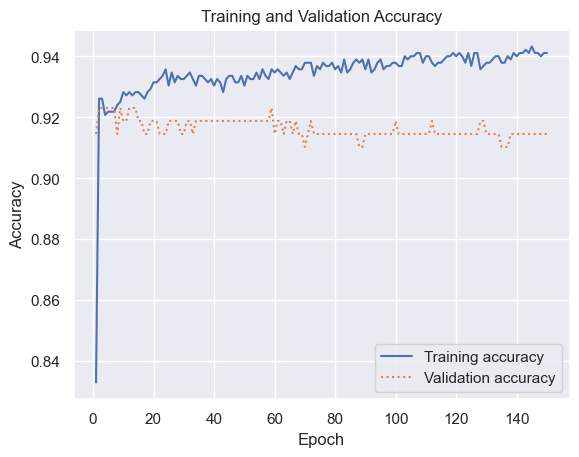

In [15]:
#Neural Networks

#Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=3))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=150, batch_size=100)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

y_predicted = model.predict(X_test) > 0.5

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,y_predicted)}')

In [16]:
#different architecture

model = Sequential() 
model.add(Dense(4, activation='relu', input_dim=3))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=150, batch_size=100)

y_predicted = model.predict(X_test) > 0.5

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,y_predicted)}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 16        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
10/10 [==============================] - 0s 13ms/step - loss: 0.7142 - accuracy: 0.9079 - val_loss: 0.7173 - val_accuracy: 0.9145
Epoch 2/150
10/10 [==============================] - 0s 3ms/step - loss: 0.7088 - accuracy: 0.9069 - val_loss: 0.7119 - val_accuracy: 0.9145
Epoch 3/150
10/10 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.9069 - val_loss: 0.7062 - val_accuracy: 0.9145
Epoch 4/150
10/10 [===========

Epoch 54/150
10/10 [==============================] - 0s 3ms/step - loss: 0.5136 - accuracy: 0.9154 - val_loss: 0.5200 - val_accuracy: 0.9231
Epoch 55/150
10/10 [==============================] - 0s 3ms/step - loss: 0.5110 - accuracy: 0.9165 - val_loss: 0.5175 - val_accuracy: 0.9231
Epoch 56/150
10/10 [==============================] - 0s 3ms/step - loss: 0.5084 - accuracy: 0.9165 - val_loss: 0.5151 - val_accuracy: 0.9231
Epoch 57/150
10/10 [==============================] - 0s 3ms/step - loss: 0.5059 - accuracy: 0.9165 - val_loss: 0.5128 - val_accuracy: 0.9231
Epoch 58/150
10/10 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.9165 - val_loss: 0.5104 - val_accuracy: 0.9231
Epoch 59/150
10/10 [==============================] - 0s 3ms/step - loss: 0.5010 - accuracy: 0.9165 - val_loss: 0.5082 - val_accuracy: 0.9231
Epoch 60/150
10/10 [==============================] - 0s 3ms/step - loss: 0.4985 - accuracy: 0.9165 - val_loss: 0.5059 - val_accuracy: 0.9231
Epoch 

10/10 [==============================] - 0s 3ms/step - loss: 0.4020 - accuracy: 0.9176 - val_loss: 0.4126 - val_accuracy: 0.9231
Epoch 112/150
10/10 [==============================] - 0s 3ms/step - loss: 0.4006 - accuracy: 0.9176 - val_loss: 0.4111 - val_accuracy: 0.9231
Epoch 113/150
10/10 [==============================] - 0s 3ms/step - loss: 0.3991 - accuracy: 0.9176 - val_loss: 0.4098 - val_accuracy: 0.9231
Epoch 114/150
10/10 [==============================] - 0s 3ms/step - loss: 0.3977 - accuracy: 0.9176 - val_loss: 0.4085 - val_accuracy: 0.9231
Epoch 115/150
10/10 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.9176 - val_loss: 0.4071 - val_accuracy: 0.9231
Epoch 116/150
10/10 [==============================] - 0s 3ms/step - loss: 0.3950 - accuracy: 0.9176 - val_loss: 0.4060 - val_accuracy: 0.9231
Epoch 117/150
10/10 [==============================] - 0s 3ms/step - loss: 0.3936 - accuracy: 0.9176 - val_loss: 0.4047 - val_accuracy: 0.9231
Epoch 118/150

In [17]:
#We have an imbalanced dataset.  We can increase recall by giving more weight to the minority class
#Fitting Logistic Regression to the Training set
classifier = LogisticRegression(class_weight='balanced')
classifier.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.9188034188034188
confusion matrix:
[[209   5]
 [ 14   6]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       214
           1       0.55      0.30      0.39        20

    accuracy                           0.92       234
   macro avg       0.74      0.64      0.67       234
weighted avg       0.90      0.92      0.91       234



In [18]:
#Another way to get around the imbalanced dataset problem is to use oversampling and undersampling

In [19]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
#try oversampling and undersampling to get around the imbalanced data problem
import imblearn
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [21]:
#Oversampling approach
#recall for the minority class is important because we want to identify as many faulty devices as possible and it's not that bad
#if we identify some good devices as faulty, whereas it would be bad if we identify as good some faulty devices
#So, we want to maximize recall for minority class

# Randomly over-sample the minority class
ros = RandomOverSampler(random_state=42, sampling_strategy='minority')
X_train_ros, Y_train_ros= ros.fit_resample(X_train, Y_train)
# Check the number of records after over sampling
print(sorted(Counter(Y_train_ros).items()))

#Fitting Logistic Regression to the randomly over-sampled Training set
classifier_ros = LogisticRegression()
classifier_ros.fit(X_train_ros,Y_train_ros)

#Predicting the Test set results
Y_pred_ros = classifier_ros.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_ros)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred_ros)}')

[(0, 848), (1, 848)]
accuracy:0.9188034188034188
confusion matrix:
[[209   5]
 [ 14   6]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       214
           1       0.55      0.30      0.39        20

    accuracy                           0.92       234
   macro avg       0.74      0.64      0.67       234
weighted avg       0.90      0.92      0.91       234



In [22]:
#KNN with oversampling

#Perform cross validation to find the optimal number of neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_ros, Y_train_ros)
# print optimal number of neighbors
print(grid_search.best_params_)
# print corresponding training accuracy
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

#Perform KNN using k=29 neighbors
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p =2) #euclidean metric
classifierKNN.fit(X_train_ros,Y_train_ros)

#Predicting the Test set results
Y_pred = classifierKNN.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 1}
Accuracy for our training dataset with tuning is : 85.85%
accuracy:0.9017094017094017
confusion matrix:
[[207   7]
 [ 16   4]]
classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       214
           1       0.36      0.20      0.26        20

    accuracy                           0.90       234
   macro avg       0.65      0.58      0.60       234
weighted avg       0.88      0.90      0.89       234



In [23]:
#Adaboost with oversampling
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=500, random_state=0)
clf.fit(X_train_ros, Y_train_ros)
#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.9102564102564102
confusion matrix:
[[205   9]
 [ 12   8]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       214
           1       0.47      0.40      0.43        20

    accuracy                           0.91       234
   macro avg       0.71      0.68      0.69       234
weighted avg       0.90      0.91      0.91       234



In [24]:
#GradientBoosting with oversampling
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=2, random_state=0).fit(X_train_ros, Y_train_ros)

#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.9188034188034188
confusion matrix:
[[208   6]
 [ 13   7]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       214
           1       0.54      0.35      0.42        20

    accuracy                           0.92       234
   macro avg       0.74      0.66      0.69       234
weighted avg       0.91      0.92      0.91       234



In [25]:
#Perform Random Forest with oversampling

#Fitting random forest classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=0)
classifier.fit(X_train_ros,Y_train_ros)

#Predicting the Test set results
Y_pred_rf = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred_rf)}')

accuracy:0.905982905982906
confusion matrix:
[[206   8]
 [ 14   6]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       214
           1       0.43      0.30      0.35        20

    accuracy                           0.91       234
   macro avg       0.68      0.63      0.65       234
weighted avg       0.89      0.91      0.90       234



In [26]:
#Fitting decision tree classifier to the Training set with oversampling
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train_ros,Y_train_ros)

#Predicting the Test set results
Y_pred = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.905982905982906
confusion matrix:
[[207   7]
 [ 15   5]]
classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       214
           1       0.42      0.25      0.31        20

    accuracy                           0.91       234
   macro avg       0.67      0.61      0.63       234
weighted avg       0.89      0.91      0.90       234



In [27]:
#SMOTE

# Randomly over sample the minority class
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote= smote.fit_resample(X_train, Y_train)
# Check the number of records after over sampling
print(sorted(Counter(Y_train_smote).items()))

#Fitting Logistic Regression to the smote Training set
classifier_smote = LogisticRegression()
classifier_smote.fit(X_train_smote,Y_train_smote)

#Predicting the Test set results
Y_pred_smote = classifier_smote.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_smote)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred_smote)}')

[(0, 848), (1, 848)]
accuracy:0.9188034188034188
confusion matrix:
[[209   5]
 [ 14   6]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       214
           1       0.55      0.30      0.39        20

    accuracy                           0.92       234
   macro avg       0.74      0.64      0.67       234
weighted avg       0.90      0.92      0.91       234



In [28]:
#Undersampling approach

# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, Y_train_rus= rus.fit_resample(X_train, Y_train)
# Check the number of records after under sampling
print(sorted(Counter(Y_train_rus).items()))

#Fitting Logistic Regression to the randomly under-sampled Training set
classifier_rus = LogisticRegression()
classifier_rus.fit(X_train_rus,Y_train_rus)

#Predicting the Test set results
Y_pred_rus = classifier_rus.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rus)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred_rus)}')

[(0, 86), (1, 86)]
accuracy:0.9188034188034188
confusion matrix:
[[209   5]
 [ 14   6]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       214
           1       0.55      0.30      0.39        20

    accuracy                           0.92       234
   macro avg       0.74      0.64      0.67       234
weighted avg       0.90      0.92      0.91       234



In [29]:
#KNN with undersampling

#Perform cross validation to find the optimal number of neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_rus, Y_train_rus)
# print optimal number of neighbors
print(grid_search.best_params_)
# print corresponding training accuracy
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

#Perform KNN using k=29 neighbors
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2) #euclidean metric
classifierKNN.fit(X_train_rus,Y_train_rus)

#Predicting the Test set results
Y_pred = classifierKNN.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 5}
Accuracy for our training dataset with tuning is : 80.85%
accuracy:0.9145299145299145
confusion matrix:
[[202  12]
 [  8  12]]
classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       214
           1       0.50      0.60      0.55        20

    accuracy                           0.91       234
   macro avg       0.73      0.77      0.75       234
weighted avg       0.92      0.91      0.92       234



In [30]:
#Adaboost with undersampling
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=500, random_state=0)
clf.fit(X_train_rus, Y_train_rus)
#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.905982905982906
confusion matrix:
[[200  14]
 [  8  12]]
classification report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       214
           1       0.46      0.60      0.52        20

    accuracy                           0.91       234
   macro avg       0.71      0.77      0.73       234
weighted avg       0.92      0.91      0.91       234



In [31]:
#GradientBoosting with undersampling
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=2, random_state=0).fit(X_train_rus, Y_train_rus)

#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.905982905982906
confusion matrix:
[[201  13]
 [  9  11]]
classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       214
           1       0.46      0.55      0.50        20

    accuracy                           0.91       234
   macro avg       0.71      0.74      0.72       234
weighted avg       0.91      0.91      0.91       234



In [32]:
#Perform Random Forest with undersampling

#Fitting random forest classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=0)
classifier.fit(X_train_rus,Y_train_rus)

#Predicting the Test set results
Y_pred_rf = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred_rf)}')

accuracy:0.9102564102564102
confusion matrix:
[[201  13]
 [  8  12]]
classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       214
           1       0.48      0.60      0.53        20

    accuracy                           0.91       234
   macro avg       0.72      0.77      0.74       234
weighted avg       0.92      0.91      0.91       234



<AxesSubplot:title={'center':'Feature Importances'}, xlabel='Relative Importance'>

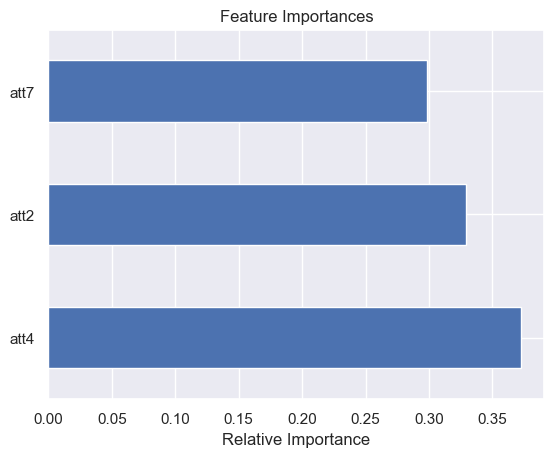

In [33]:
# get importance
importances = classifier.feature_importances_
from matplotlib import pyplot as plt
plt.title('Feature Importances')
plt.xlabel('Relative Importance')

feat_importances = pd.Series(classifier.feature_importances_, index=df_new.iloc[:,0:-1].columns)
feat_importances.nlargest(4).plot(kind='barh')

accuracy:0.9102564102564102
confusion matrix:
[[201  13]
 [  8  12]]
classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       214
           1       0.48      0.60      0.53        20

    accuracy                           0.91       234
   macro avg       0.72      0.77      0.74       234
weighted avg       0.92      0.91      0.91       234



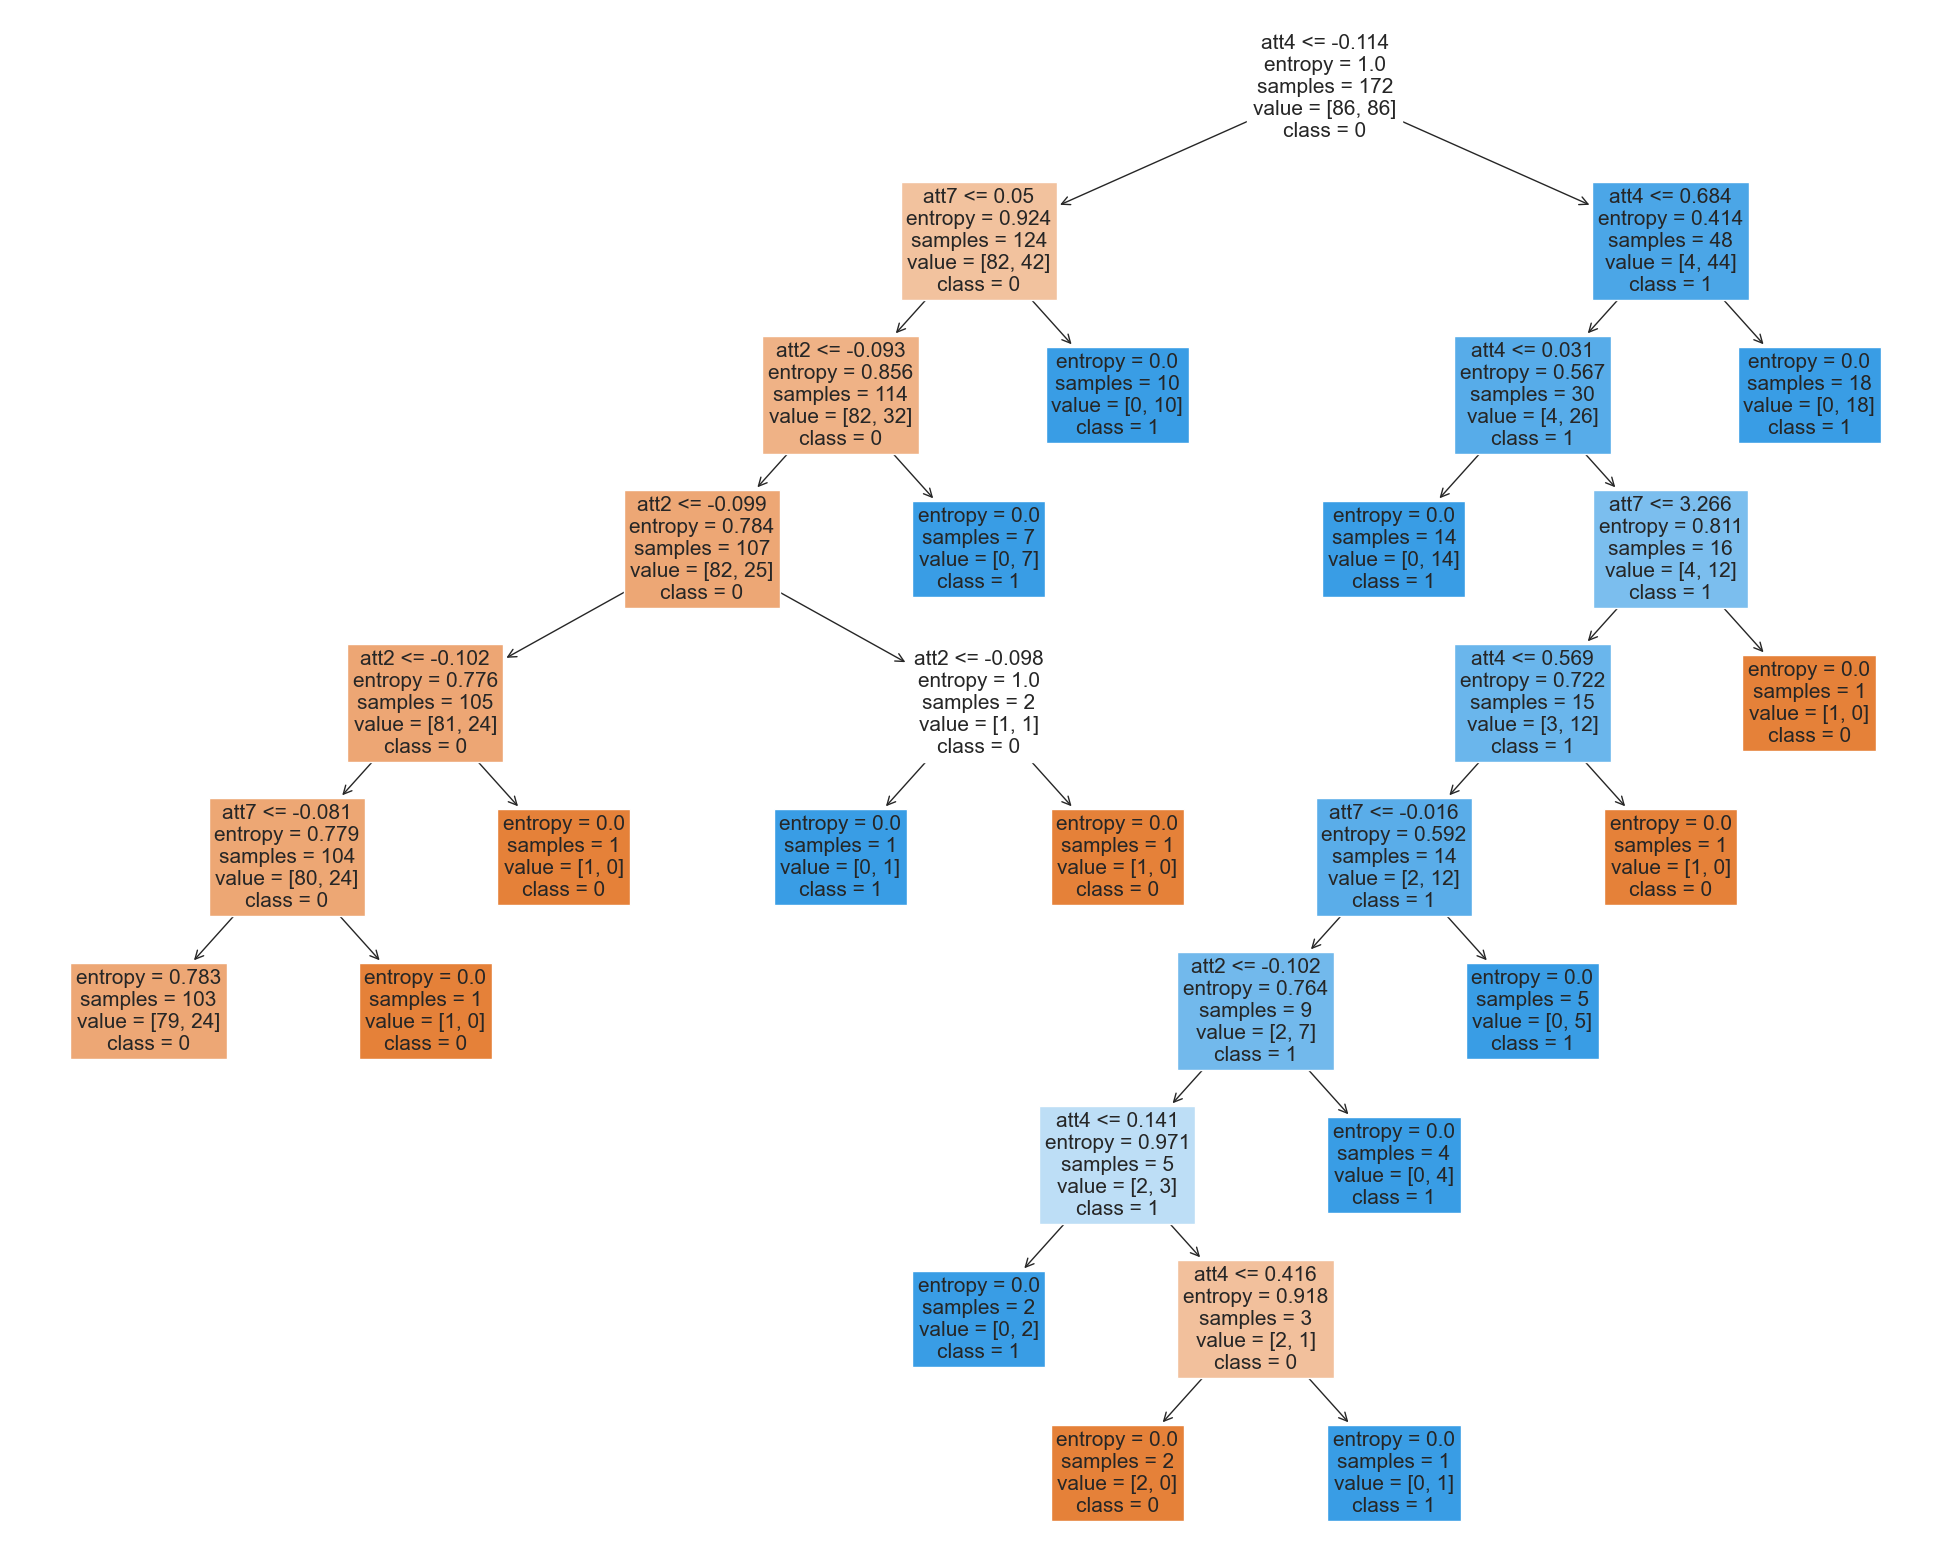

In [34]:
#Fitting decision tree classifier to the Training set with undersampling
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train_rus,Y_train_rus)

#Predicting the Test set results
Y_pred = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier,
                   feature_names=df_new.iloc[:,0:-1].columns,  
                   class_names=['0','1'],fontsize=15,
                   filled=True)

#the blue nodes correspond to class '1', that is, 'faulty'.  The orange nodes correspond to class '0', 'not faulty'



<AxesSubplot:title={'center':'Feature Importances'}, xlabel='Relative Importance'>

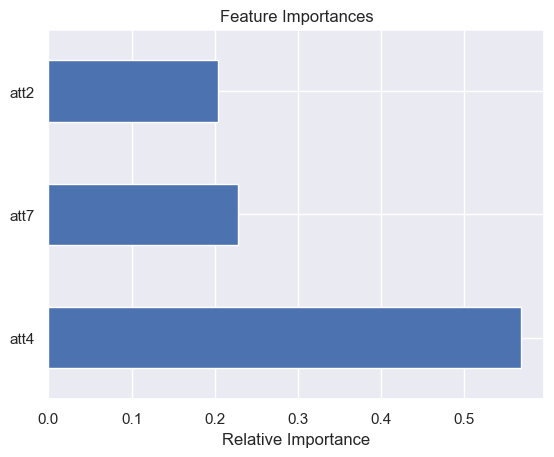

In [35]:
# get importance
importances = classifier.feature_importances_
from matplotlib import pyplot as plt
plt.title('Feature Importances')
plt.xlabel('Relative Importance')

feat_importances = pd.Series(classifier.feature_importances_, index=df_new.iloc[:,0:-1].columns)
feat_importances.nlargest(4).plot(kind='barh')

In [36]:
# Under sample the majority class
nearmiss = NearMiss(version=1)
X_train_nearmiss, Y_train_nearmiss= nearmiss.fit_resample(X_train, Y_train)
# Check the number of records after over sampling
print(sorted(Counter(Y_train_nearmiss).items()))

#Fitting Logistic Regression to the randomly under-sampled Training set
classifier_nearmiss = LogisticRegression()
classifier_nearmiss.fit(X_train_nearmiss,Y_train_nearmiss)

#Predicting the Test set results
Y_pred_nearmiss = classifier_nearmiss.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_nearmiss)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred_nearmiss)}')

[(0, 86), (1, 86)]
accuracy:0.9188034188034188
confusion matrix:
[[208   6]
 [ 13   7]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       214
           1       0.54      0.35      0.42        20

    accuracy                           0.92       234
   macro avg       0.74      0.66      0.69       234
weighted avg       0.91      0.92      0.91       234

